# Iris Dataset

## Objective



In [2]:
# Data analysis
import pandas as pd
import numpy as np

# Visualization tool
import matplotlib.pyplot as plt
import seaborn as sns

# Help adjusting output
from IPython.display import HTML

# Dataset
from sklearn.datasets import load_iris

In [3]:
# Change seaborn as default and set theme
sns.set()
sns.set_theme()

In [4]:
# Helper functions
# Display dataframes side by side
def display_inline(dataframes, titles):
    html = '<div style="display:flex">'
    for df, title in zip(dataframes, titles):
        html += '<div style="margin-right: 2em; text-align=center">'
        html += '<div style="text-align:center">' + title + '</div>'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    return display(HTML(html))

## Data understanding

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken from Fisher’s paper. Note that it’s the same as in R, but not as in the UCI Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the pattern recognition literature. Fisher’s paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.


In [5]:
# Load `iris` dataset from scikit-learn lib
data = load_iris()

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target
target_names = data.target_names.tolist()

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Current dataframe has no category indicating the to which class each row belongs.
To solve this and have a better EDA we will add the category from `target` as a new column 

In [8]:
# Add category from target as a new columnabs
df['species'] = data.target

# Map values to names
species_names = data.target_names.tolist()
df['species'] = df['species'].map({
    0: species_names[0],
    1: species_names[1], 
    2: species_names[2]
})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Map column names to make it easier to reference

In [9]:
# Change column names to make it easier
df = df.rename(columns={
    'sepal length (cm)': 'SL',
    'sepal width (cm)': 'SW',
    'petal length (cm)': 'PL',
    'petal width (cm)': 'PW'
})
df.head()

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Information

In [10]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Null

Dataset has no null values

In [11]:
df.isna().sum()

SL         0
SW         0
PL         0
PW         0
species    0
dtype: int64

### Duplicates

Dataset has one duplicated row, we won't remove it

In [12]:
# Check for duplicated rows
df.duplicated(keep=False).sum()

np.int64(2)

In [13]:
# Show duplicated rows
df[df.duplicated(keep=False)]


,SL,SW,PL,PW,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


### Statistics

In [14]:
# Count number of entrie per specieabs
df.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [15]:
# Get basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SW,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
PL,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [16]:
# Calculate proportion between lengh and width of sepals and petal
df['Sepal_Prop'] = df['SL'] / df['SW']
df['Petal_Prop'] = df['PL'] / df['PW']

In [17]:
# Statistics per specie
stats_species = [df[df['species'] == specie].describe().T for specie in target_names]

# Show dataframes
display_inline(stats_species, target_names)

,count,mean,std,min,25%,50%,75%,max
SL,50.0,5.006000,0.352490,4.300000,4.800000,5.000000,5.200000,5.800000
SW,50.0,3.428000,0.379064,2.300000,3.200000,3.400000,3.675000,4.400000
PL,50.0,1.462000,0.173664,1.000000,1.400000,1.500000,1.575000,1.900000
PW,50.0,0.246000,0.105386,0.100000,0.200000,0.200000,0.300000,0.600000
Sepal_Prop,50.0,1.470188,0.118750,1.268293,1.385684,1.463063,1.541444,1.956522
Petal_Prop,50.0,6.908000,2.854545,2.666667,4.687500,7.000000,7.500000,15.000000
,count,mean,std,min,25%,50%,75%,max
SL,50.0,5.936000,0.516171,4.900000,5.600000,5.900000,6.300000,7.000000
SW,50.0,2.770000,0.313798,2.000000,2.525000,2.800000,3.000000,3.400000
PL,50.0,4.260000,0.469911,3.000000,4.000000,4.350000,4.600000,5.100000


## Visualization

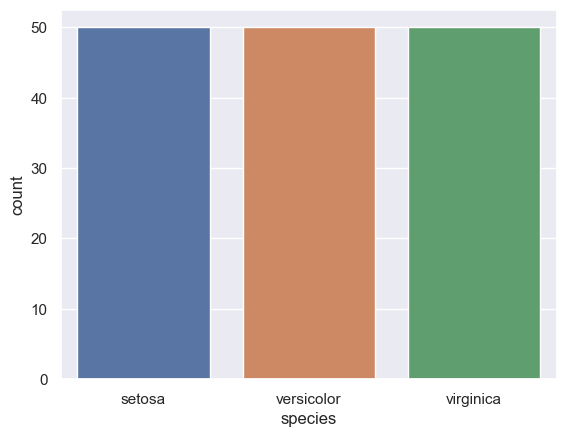

In [18]:
# Show count the number of entries in each category
sns.countplot(df, x='species', hue='species')
plt.show()

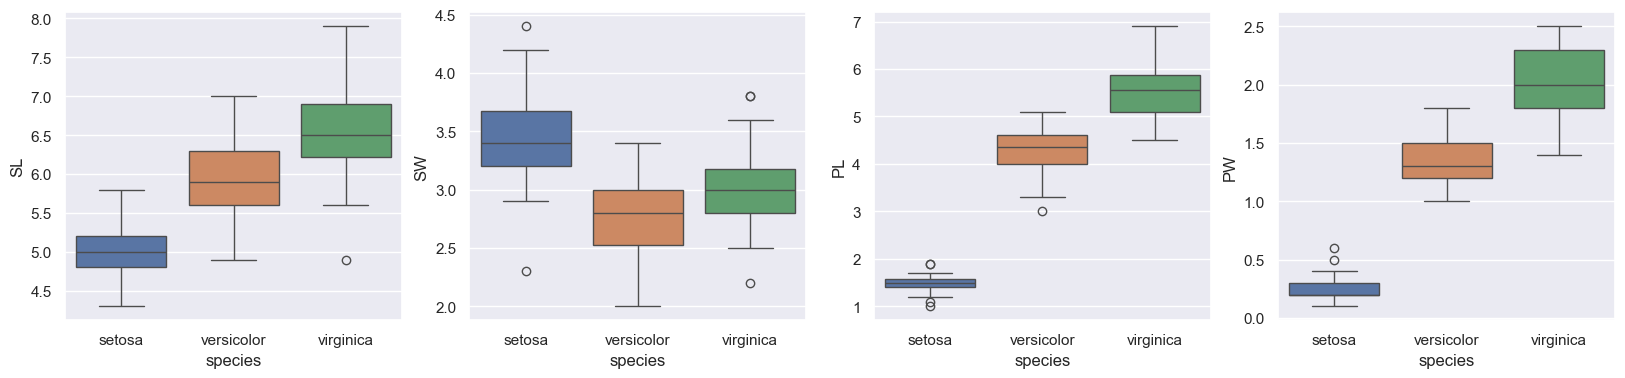

In [19]:
# Show statistics for each category
fig, ax = plt.subplots(ncols=4, figsize=(20, 4))

sns.boxplot(df, x='species', y='SL', ax=ax[0], hue='species')
sns.boxplot(df, x='species', y='SW', ax=ax[1], hue='species')
sns.boxplot(df, x='species', y='PL', ax=ax[2], hue='species')
sns.boxplot(df, x='species', y='PW', ax=ax[3], hue='species')

plt.show()

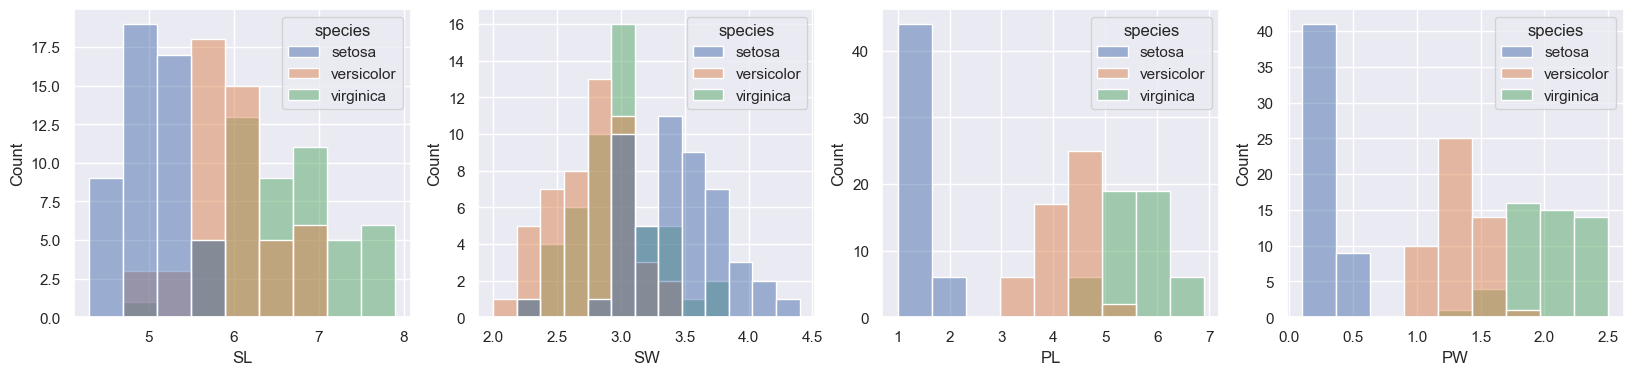

In [20]:
# Show histogram of values for each category
fig, ax = plt.subplots(ncols=4, figsize=(20, 4))

sns.histplot(df, x='SL', ax=ax[0], hue='species')
sns.histplot(df, x='SW', ax=ax[1], hue='species')
sns.histplot(df, x='PL', ax=ax[2], hue='species')
sns.histplot(df, x='PW', ax=ax[3], hue='species')
plt.show()

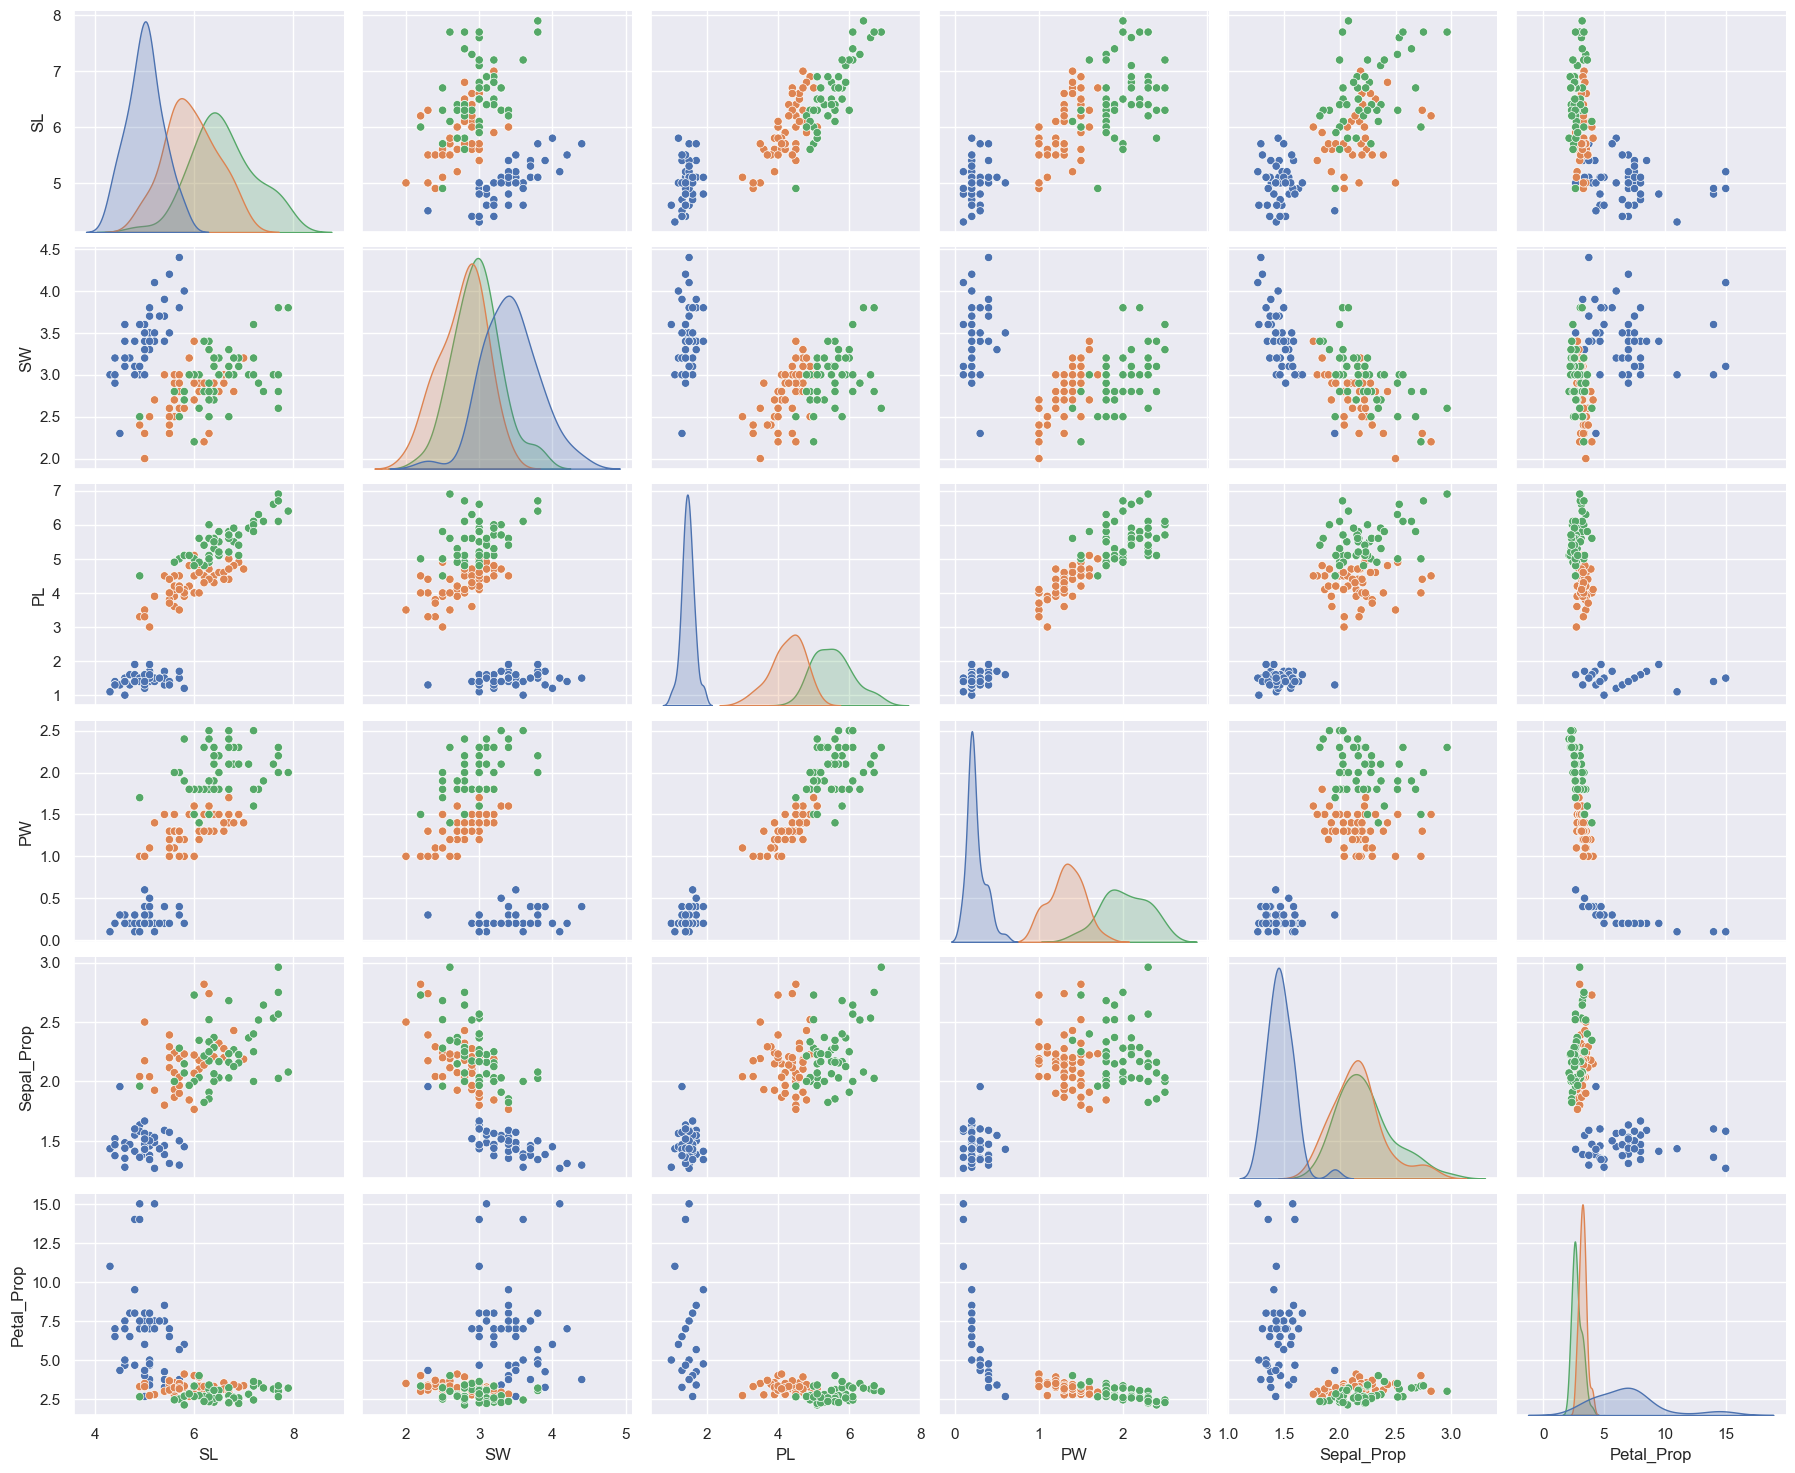

In [21]:
# Show correlation between features
g = sns.pairplot(df, hue='species')
g.fig.set_size_inches(20, 15)
g._legend.remove()
plt.show()

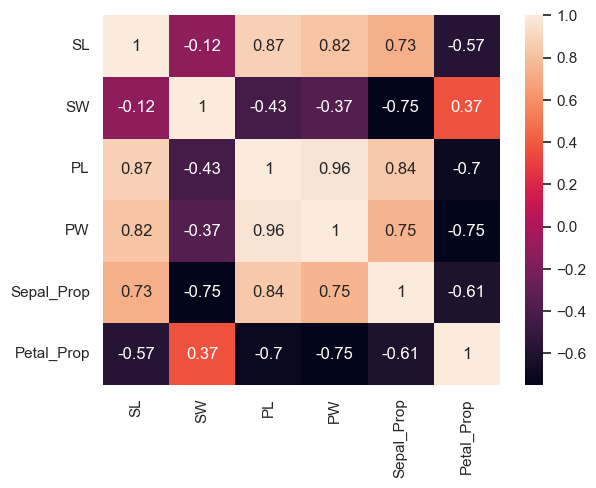

In [22]:
# Plot a correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

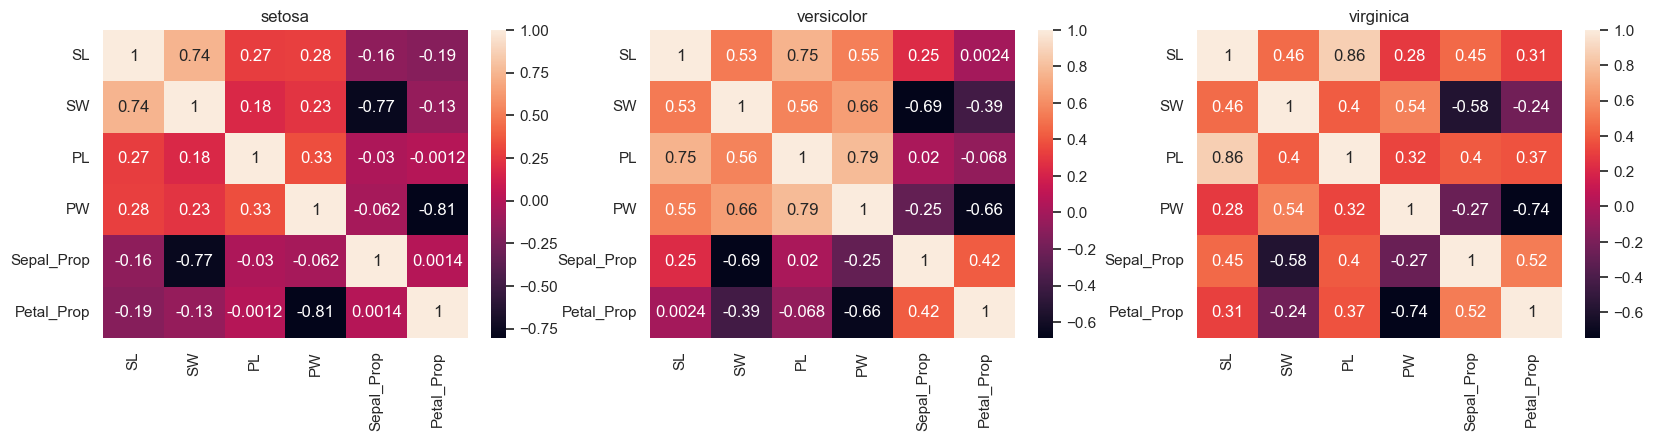

In [23]:
# Show correlation matrix for each specie
fig, ax = plt.subplots(ncols=3, figsize=(20, 4))

# Calculate correlation for each specie
corr_arr = [df[df['species'] == specie].corr(numeric_only=True) for specie in target_names]

for i, specie in enumerate(target_names):
    sns.heatmap(corr_arr[i], annot=True, ax=ax[i])
    ax[i].title.set_text(specie)

plt.show()

In [25]:
# Understand which feature have more relevante to the model
from sklearn.feature_selection import mutual_info_classif

In [31]:
# Keep only features columns
df_features = df.drop(columns='species')

# All data is already numeric, so we won't need to encode anything
# No features are discrete
scores = mutual_info_classif(X=df_features, y=target)
print("Scores:", scores)

Scores: [0.48384093 0.2656822  0.98782285 0.98230151 0.62787662 0.62695066]


In [38]:
# Transform scores array to a pd.Series object
scores = pd.Series(scores, index=df_features.columns).sort_values(ascending=False)
display(scores)

PL            0.987823
PW            0.982302
Sepal_Prop    0.627877
Petal_Prop    0.626951
SL            0.483841
SW            0.265682
dtype: float64

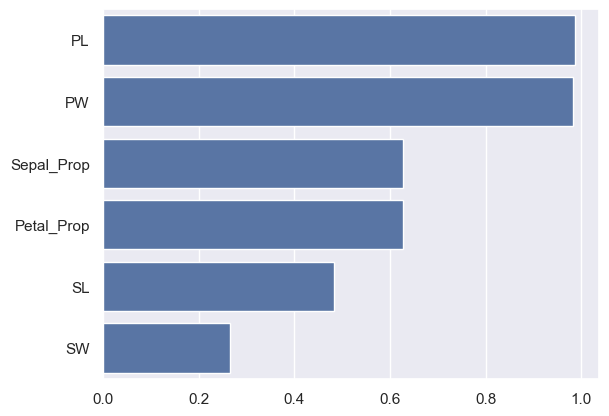

In [39]:
# Visualize scores
sns.barplot(scores, orient='h')
plt.show()

## Data preparation